# Analyzing Boosting Tree Ensembles

Boosting is a type of ensemble methods that combines the predictions from many base (or weak) learners sequentially. A base learner in this case is often a simple model (in our case, a decision tree classifiers). Adaptive Boosting (AdaBoost) algorithm is one of the well-known boosting methods, which involves using relatively small trees sequentially trained. Consecutive models attempt to refine and correct the predictions made by the previous model by weighing the training dataset and assigning more importance on training instances which the prior model made prediction errors.

You will use a subset of the auto-mpg dataset from UCI (https://archive.ics.uci.edu/ml/datasets/auto+mpg). A cleaned and preprocessed copy of that dataset is provided to you (`auto-mpg6780.csv`) and using the below code you can read it into a pandas DataFrame with the following snippet.

In [1]:
#import utility libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

desc_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
target_feature = 'origin'
target_names = ['US', 'EU', 'ASIA']
df = pd.read_csv('auto-mpg6780.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,1
1,15.0,8,350.0,165,3693,11.5,1
2,18.0,8,318.0,150,3436,11.0,1
3,16.0,8,304.0,150,3433,12.0,1
4,17.0,8,302.0,140,3449,10.5,1


## Q1. Create training and testing datasets (5 pts)
Use the DataFrame created above from the cleaned `auto-mpg` dataset. You can use `train_test_split` from `sklearn.model_selection`.  The `random_state` parameter in `train_test_split` should be set to your panther id number's last two digits and the training set should have 3 times more instances than the testing set (i.e., 75%-25% split).

In [2]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth = 2, criterion='entropy', random_state = 91)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[desc_features], df['origin'],  
                                                    test_size=0.25, random_state=91)

## Q2. Training and testing a simple decision tree model (15 pts)
Using sklearn's decision tree classifier (`DecisionTreeClassifier`), initialize a tree-based classification model. Set the max_depth to 2. Then, train and test the error rate of your classifier. Also, include the confusion matrix and the error rate for your classifier.

In [3]:
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=91)

In [4]:
y_pred = dt_clf.predict(X_test)
y_pred

array([1, 2, 1, 3, 3, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1,
       1, 1, 3, 2, 3, 3, 3, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 1,
       1, 3, 3, 3, 1, 3, 1, 1, 2, 2, 3, 3])

In [5]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.73

In [6]:
error=1-accuracy
error

0.27

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

cm_df = pd.DataFrame(cm)
cm_df

,0,1,2
0,55,10,2
1,2,6,6
2,2,5,12


## Q3. Visualize the trained decision tree and interpret the feature importance (15 pts)
Visualize the decision tree and identify the most informative feature in your training set (with the highest information gain). 

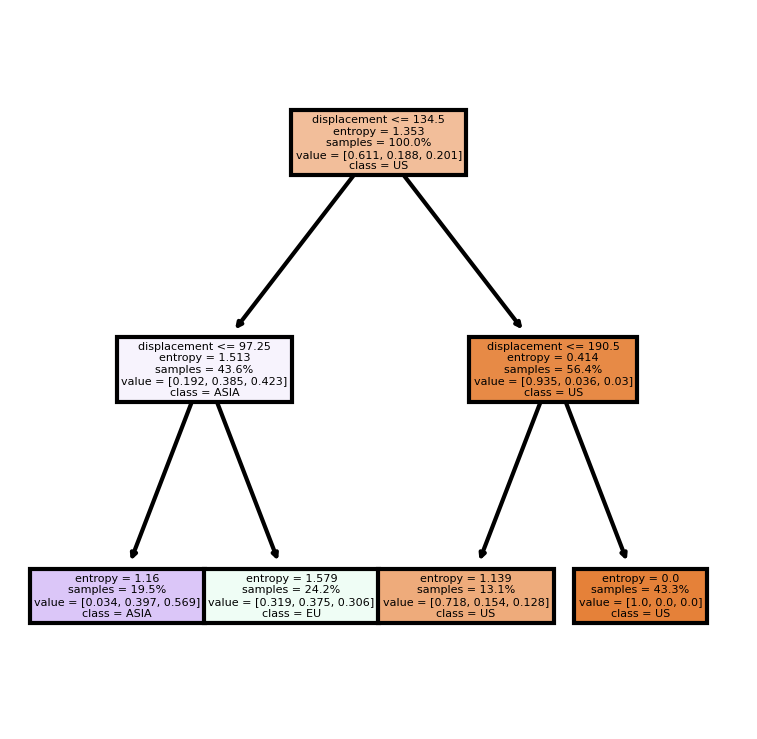

In [8]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(dt_clf, feature_names = desc_features, class_names=target_names, filled = True, proportion='True');


The most informative feature is "Displacement"

## Q4. Create a boosting ensemble. 
Using the `AdaBoostClassifier` from `sklearn.ensemble`, build a boosting ensemble. Boosting ensemble starts with a simple learning model, often a decision tree, and progressively updates the weights of the training instances to better predict the misclassified instances in previous iterations.

You are expected to use `DecisionTreeClassifier` (see `base_estimator` parameter in [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)) as your base estimator, with `max_depth` set to 2 as in the case of Q2. Use 4 estimators (`n_estimators=4`). 

After training and obtaining the error rate for your AdaBoost ensemble, evaluate the testing accuracy (or error rate). Note that you need to train and test using the same samples from Q1 and Q2. Compare your results with the accuracy scores from Q2.

In [9]:
from sklearn.ensemble import AdaBoostClassifier


In [10]:
bt= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2, criterion='entropy', random_state = 91),n_estimators=4,learning_rate=1)

In [11]:
pred=bt.fit(X_train,Y_train).predict(X_test)

In [12]:
accuracy = accuracy_score(Y_test, pred)
accuracy

0.7

In [13]:
error=1-accuracy
error

0.30000000000000004

In question 2 the accuracy score was 73 whereas in question 4 its 70

## Q5. Visualize the boosted trees
Visualize the individual estimators (base learners) in the AdaBoost classifier you have trained in Q4. Identify the similarities between the first estimator (the initially trained one in the ensemble) and the one you trained in Q2 (and visualized in Q3). How do the subsequent learners change? Which features are given more importance in the subsequent iterations? 

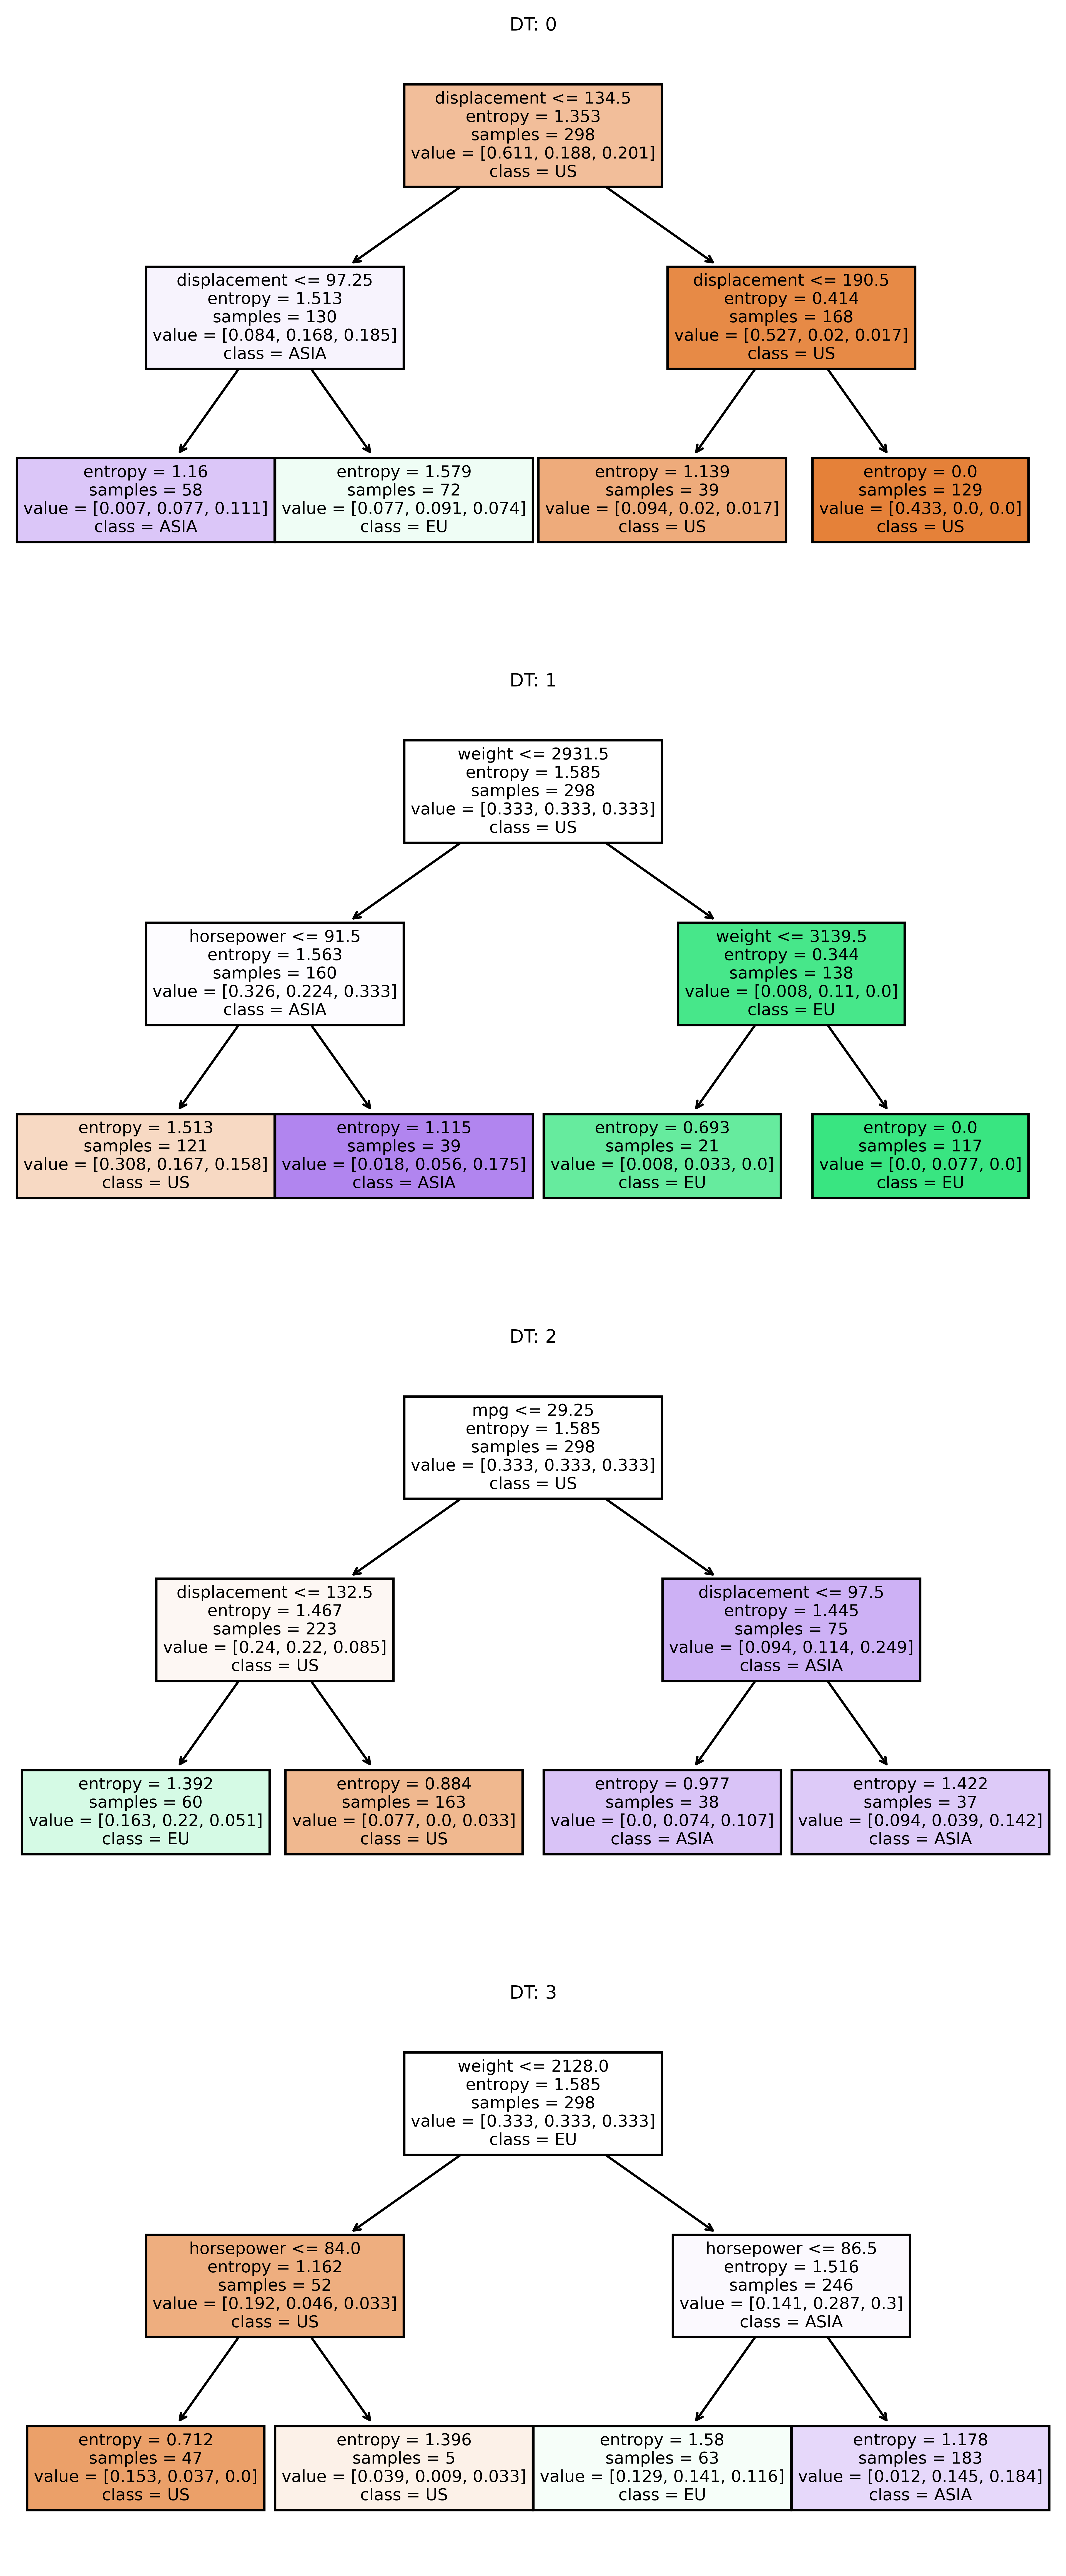

In [14]:
fig, axes = plt.subplots(nrows = 4,ncols = 1,figsize = (8,20), dpi=600)
for i in range(4):
    tree.plot_tree(bt.estimators_[i], feature_names = desc_features, class_names=target_names,filled = True, ax = axes[i])
    axes[i].set_title('DT: ' + str(i), fontsize = 8)


Similarities in both questions is that both used crieterion as entropy, max_depth as 2 and random_state is 91.
In DT:0, displacement was given importance.
In DT:1, weight was given importance followed by horsepower and weight.
In DT:2, mpg was given importance followed by displacement.
In DT:3, weight was given importance followed by horsepower.

## Q6. Increase the number of estimators and observe the error rate.
Progressively increase the number of estimators from 4 to 100 in your AdaBoostClassifier. Plot a line chart showing the progression of the error rate or accuracy as you increase the number of estimators in your ensemble. Based on your results, what do you think would be a good parameter for number of estimators? Why?

In [15]:
acc=[]
est=[]
for i in range(4,101):
    bt= AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2, criterion='entropy', random_state = 91),n_estimators=i,learning_rate=1)
    pred=bt.fit(X_train,Y_train).predict(X_test)
    accuracy = accuracy_score(Y_test, pred)
    acc.append(accuracy)
    est.append(i)
    

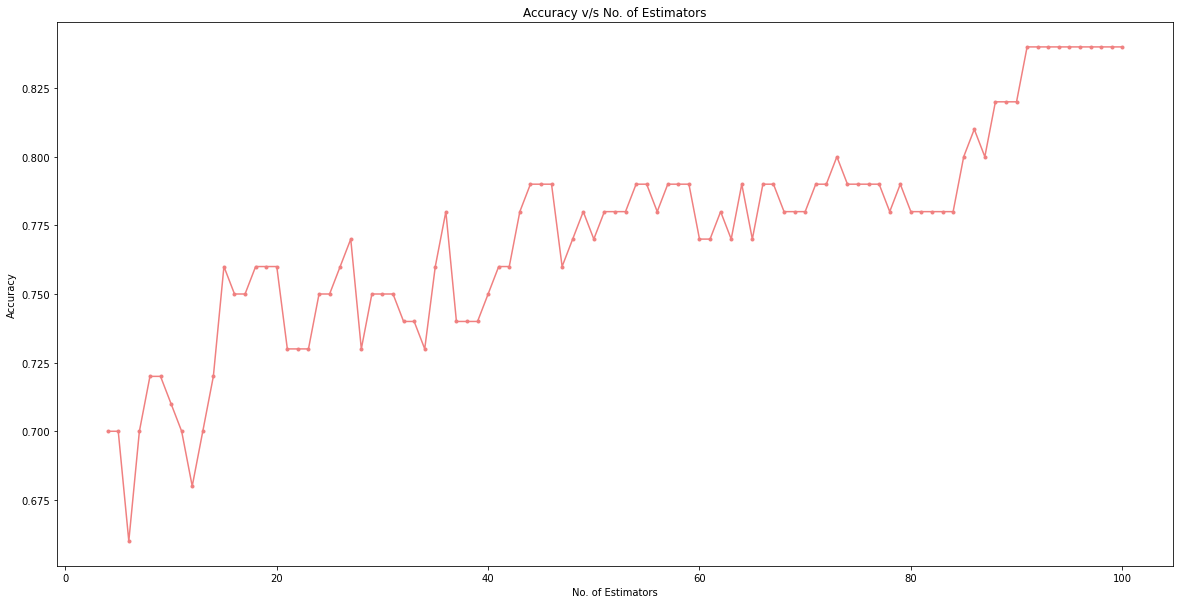

In [16]:

plt.subplots(figsize=(20,10))

plt.plot(est,acc, color='lightcoral', marker='.' )
plt.ylabel('Accuracy') 
plt.xlabel('No. of Estimators') 
plt.title("Accuracy v/s No. of Estimators")
plt.show() 

Good parameter for number of estimaters is random_state i.e randomness because when it is varied the line plot  changes accordingly. One cannot determine exact number of estimators that is ideal for high accuracy. But for this graph, the maximum accuracy is after 90 estimators.